In [1]:
from diffusers import DiffusionPipeline, AutoPipelineForText2Image
import torch
from PIL import Image 

/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/diffusers/models/vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQModel`, instead.
  deprecate("VQModel", "0.31", deprecation_message)


In [2]:
pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]


In [6]:
import json

# Assuming you've uploaded the JSON file to your Colab environment
with open('/home/charchit/create_workflow/simple_prompts.json', 'r') as file:
    prompts_data = json.load(file)

prompts = prompts_data['prompts']

# # Now you can iterate through the prompts
# for prompt in prompts:
#     print(f"Generating image for prompt {prompt['id']}:")
#     print(prompt['text'])
#     # Your image generation code here
#     print("\n")

In [32]:
prompts[0]['text']

'A tall woman in her 30s with long black hair, wearing a red business suit and high heels, standing confidently with hands on hips against a plain white background.'

In [ ]:
for val in prompts:
	
	print(val['text'])
	image = pipeline(
		val['text'],
	).images[0]
	image.save(f"/home/charchit/create_workflow/prompts_standing_SD1.5/standing_image_{val['id']}.png")


In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def visualize_and_save_image_comparison(folder_512, folder_2048, output_folder, num_images=5, display=True):
    """
    Visualize images from two folders side by side and save the comparison.
    
    :param folder_512: Path to the folder containing 512x512 images
    :param folder_2048: Path to the folder containing 2048x2048 images
    :param output_folder: Path to save the comparison images
    :param num_images: Number of image pairs to visualize (default is 5)
    :param display: Whether to display the plots (default is True)
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get list of image files
    images_512 = sorted([f for f in os.listdir(folder_512) if f.endswith('.png')])
    images_2048 = sorted([f for f in os.listdir(folder_2048) if f.endswith('.png')])
    
    # Ensure we have matching pairs
    num_pairs = min(len(images_512), len(images_2048), num_images)
    
    for i in range(num_pairs):
        # Load images
        img_512 = Image.open(os.path.join(folder_512, images_512[i]))
        img_2048 = Image.open(os.path.join(folder_2048, images_2048[i]))
        
        # Create figure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        
        # Display images
        ax1.imshow(img_512)
        ax1.set_title(f'512x512: {images_512[i]}')
        ax1.axis('off')
        
        ax2.imshow(img_2048)
        ax2.set_title(f'2048x2048: {images_2048[i]}')
        ax2.axis('off')
        
        plt.tight_layout()
        
        # Save the comparison
        save_path = os.path.join(output_folder, f'comparison_{i+1}.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved comparison to {save_path}")
        
        if display:
            plt.show()
        else:
            plt.close()

# Example usage:
# visualize_and_save_image_comparison('/path/to/512x512/folder', '/path/to/2048x2048/folder', '/path/to/output/folder', num_images=3, display=True)

In [ ]:
visualize_and_save_image_comparison('/home/charchit/create_workflow/simple_prompts_sd1.5', '/home/charchit/create_workflow/super_resolution/Real-ESRGAN/results', '/home/charchit/create_workflow/comparison_folder_normal_prompts_sd1.5vsrealSRGAN/', num_images=10, display=True)

In [1]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

# let's download an  image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")


/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]


In [4]:
import numpy as np
np.array(low_res_img).shape

(128, 128, 3)

In [5]:
prompt = "a white cat"

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")


100%|██████████| 75/75 [00:06<00:00, 11.87it/s]


In [6]:
np.array(Image.open("upsampled_cat.png")).shape

(512, 512, 3)

In [8]:
### PROMPT STYLES!

# The format is: "[STYLE OF PHOTO] photo of a [SUBJECT], [IMPORTANT FEATURE], [MORE DETAILS], [POSE OR ACTION], [FRAMING], [SETTING/BACKGROUND], [LIGHTING], [CAMERA ANGLE], [CAMERA PROPERTIES], in style of [PHOTOGRAPHER]"

# Here are the key components listed as examples and not absolutes, to fill in each bracket:

# STYLE OF PHOTO: Analog, candid, beauty, high fashion, instant, large format, glamor, lifestyle, paparazzi, pictorialist, Polaroid, use others not slisted as an example as appropriate and/or for variation.

# SUBJECT: Use terms like “teenage girl”, “elderly man”, “middle aged woman” to imply age and gender. The tag “age followed by a number” like “age 30” can further pin down age. Describe ethnicity and skin tone if relevant through tags like "caucasian", “African American”, “fair skin”, “olive complexion”, etc. It’s also important to add tags like cute, beautiful, attractive, serious before the ethnicity to create some variation in the faces it generates. Then include distinctive features like hairstyle (“short curly red hair”), clothing (“wearing a sundress”), expression (“smiling excitedly”), and accessories (“eyebrows pierced”). Unique details make the subject feel more like a specific individual.

# FRAMING: Close up on the face, full body, head shot, upper body, from behind, use others not slisted as an example as appropriate and/or for variation.

# SETTING/BACKGROUND: Provide relevant contextual details but avoid being overly prescriptive. An example could be: "on the rocky edge of a cliff overlooking a misty forested valley at dawn".

# LIGHTING: Bounced lighting, candid lighting, chiaroscuro, cinematic lighting, soft diffused lighting, edge lighting, fill lighting, flash photography, god rays, golden hour, use others not slisted as an example as appropriate and/or for variation.

# CAMERA ANGLE: Dutch angle, from above/high angle, from below/low angle, eye level.

# CAMERA PROPERTIES: Aaton LTR, ARRI ALEXA 65, Bolex H16, RED Digital Cinema Camera, Canon EOS 5D, Fujifilm X-T4, Hasselblad X1D II, Lumix GH5, Pentax 645Z, use others not slisted as an example as appropriate and/or for variation.

# PHOTOGRAPHER: Choose a photographer that fits the style of the image. For example, "by Vivian Maier".

In [2]:
!pip install peft


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 6.0 MB/s eta 0:00:00ta 0:00:01


In [1]:
import torch
from diffusers import DiffusionPipeline, LCMScheduler

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    variant="fp16",
    torch_dtype=torch.float16
).to("cuda")

# set scheduler
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

# load LCM-LoRA
pipe.load_lora_weights("latent-consistency/lcm-lora-sdxl")

prompt = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."

generator = torch.manual_seed(42)
image = pipe(
    prompt=prompt, num_inference_steps=4, generator=generator, guidance_scale=1.0
).images[0]

/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  7.21it/s]
The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


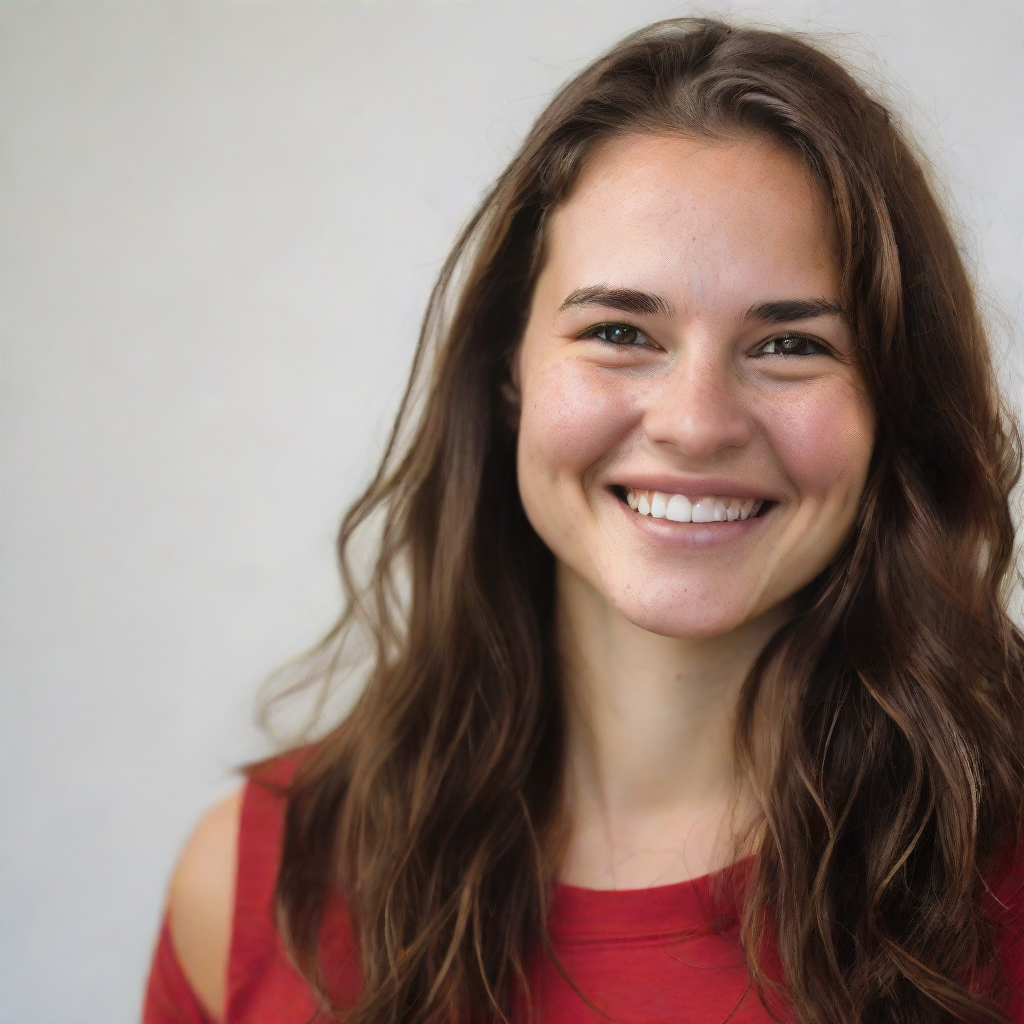

In [2]:
image

In [1]:
import numpy as np
from PIL import Image


np.array(Image.open("/home/charchit/create_workflow/simple_prompts_lcmLORA/image_1.png")).shape

(1024, 1024, 3)

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"RunDiffusion/Juggernaut-XL-v9", torch_dtype=torch.float16, variant="fp16"
).to("cuda")



/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/diffusers/models/vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a 

100%|██████████| 50/50 [00:14<00:00,  3.40it/s]


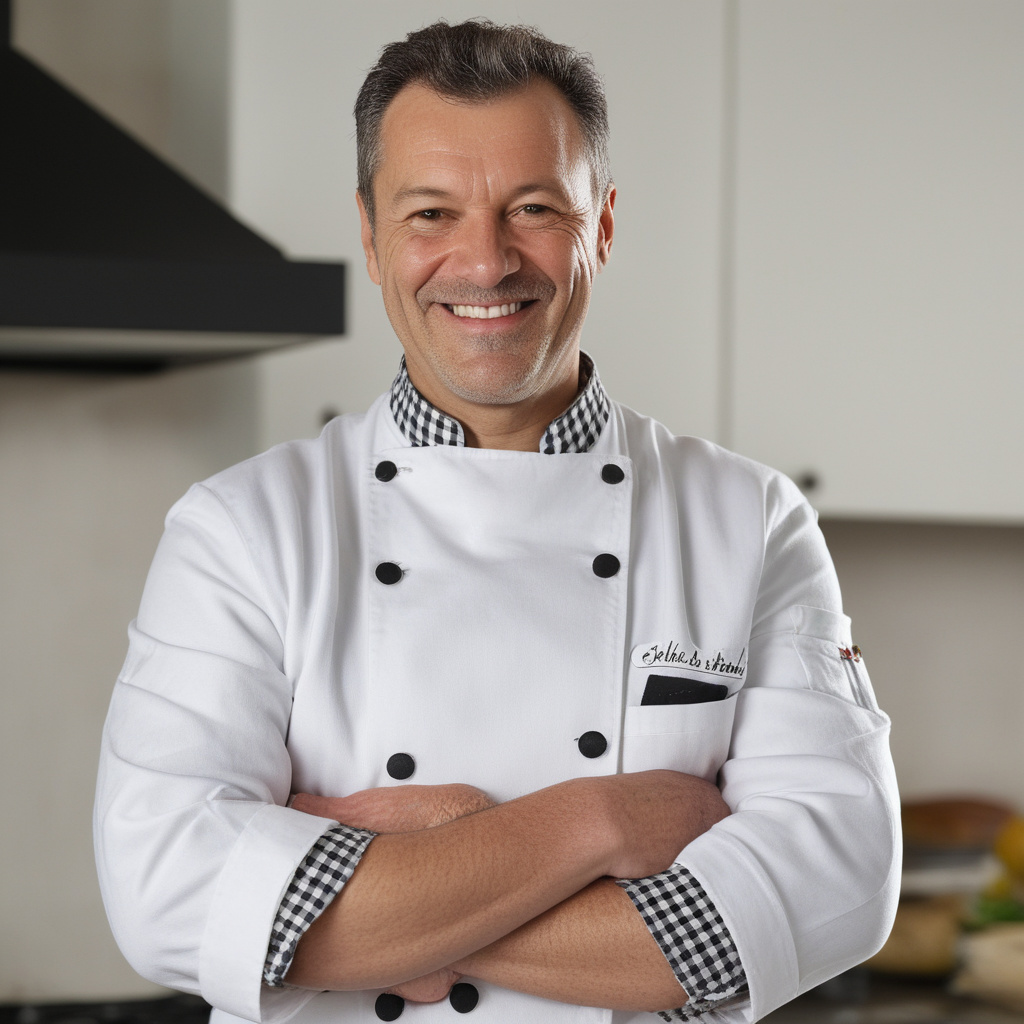

In [7]:
import json

# Assuming you've uploaded the JSON file to your Colab environment
with open('/home/charchit/create_workflow/full_body_prompts.json', 'r') as file:
    prompts_data = json.load(file)

prompts = prompts_data['prompts']
image = pipeline(
    prompts[6]['text'],
).images[0]
image

In [5]:
import numpy as np
np.array(image).shape

(1024, 1024, 3)

In [12]:
import torch
from diffusers import DiffusionPipeline, TCDScheduler
from huggingface_hub import hf_hub_download
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "ByteDance/Hyper-SD"
ckpt_name = "Hyper-SDXL-1step-lora.safetensors"
# Load model.
pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe.load_lora_weights(hf_hub_download(repo_name, ckpt_name))
pipe.fuse_lora()
# Use TCD scheduler to achieve better image quality
pipe.scheduler = TCDScheduler.from_config(pipe.scheduler.config)
# Lower eta results in more detail for multi-steps inference
eta=1.0

Loading pipeline components...:  14%|█▍        | 1/7 [00:00<00:02,  2.54it/s]

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.12it/s]
The config attributes {'skip_prk_steps': True} were passed to TCDScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall.


100%|██████████| 10/10 [00:01<00:00,  5.54it/s]


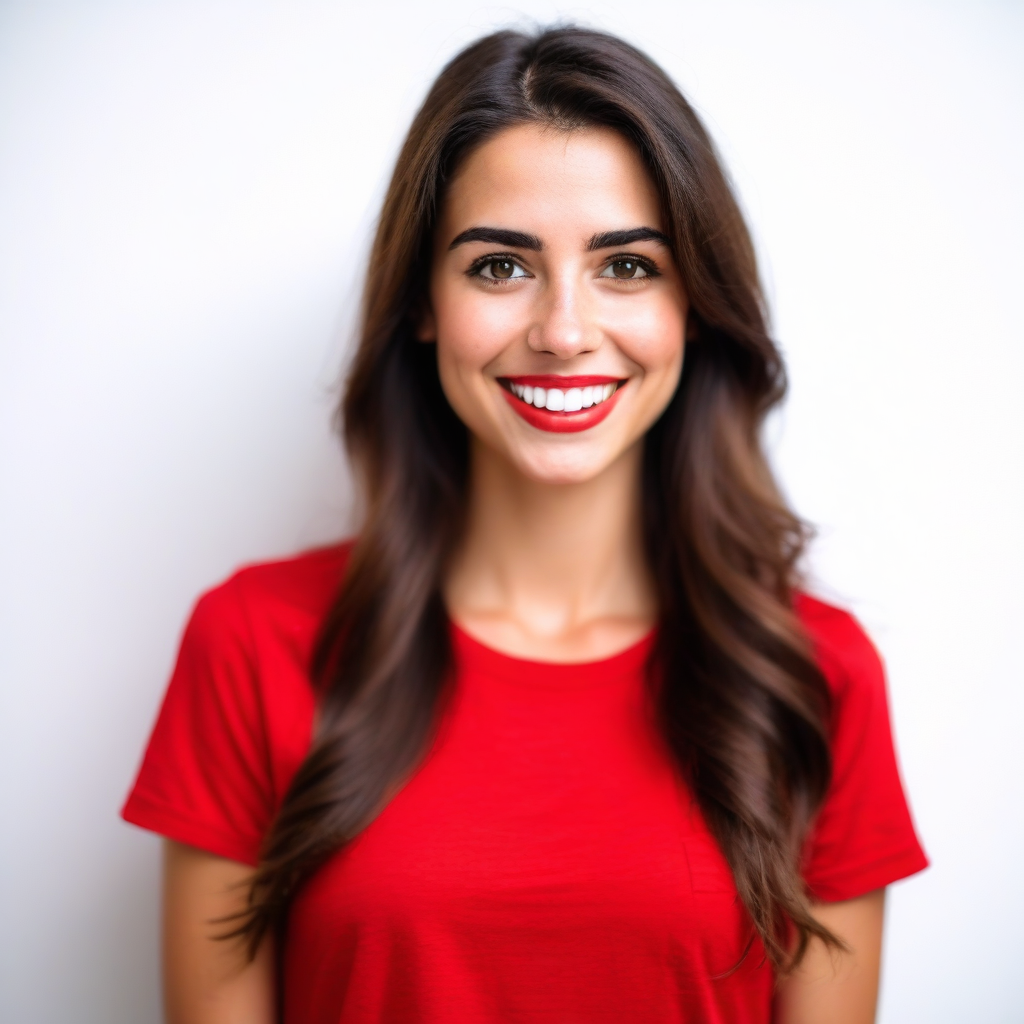

In [17]:
prompt=prompts[0]['text']
print(prompt)
image=pipe(prompt=prompt, num_inference_steps=10, guidance_scale=0, eta=eta).images[0]
image

In [18]:
prompt

'A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall.'

In [6]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

def calculate_similarity(image_path, text):
    # Open the image using PIL
    image = Image.open(image_path)

    # Prepare the inputs for the model
    inputs = processor(text=[text], images=image, return_tensors="pt", padding=True)

    # Get the embeddings from the model
    with torch.no_grad():
        outputs = model(**inputs)
        image_embeds = outputs.image_embeds
        text_embeds = outputs.text_embeds

    # Calculate the cosine similarity between the image and text embeddings
    similarity = torch.cosine_similarity(image_embeds, text_embeds)
    return similarity.item()

# Example usage

# for i in range(1, 9):
#     image_path = f'/home/charchit/create_workflow/simple_prompts_sd1.5/image_{i}.png'
#     text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
#     similarity_score = calculate_similarity(image_path, text)
#     print(f"Similarity between image and text {i}: {similarity_score}")
image_path = '/home/charchit/create_workflow/simple_prompts_sd1.5/image_1.png'
text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
similarity_score = calculate_similarity(image_path, text)

print(f"Similarity between image and text: {similarity_score}")


Similarity between image and text: 0.3406842350959778


In [7]:
image_path = '/home/charchit/create_workflow/simple_prompts_lcmLORA/image_1.png'
text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
similarity_score = calculate_similarity(image_path, text)

print(f"Similarity between image and text: {similarity_score}")


Similarity between image and text: 0.3300405740737915


In [8]:
image_path = '/home/charchit/create_workflow/simple_prompts_juggernaut/image_1.png'
text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
similarity_score = calculate_similarity(image_path, text)

print(f"Similarity between image and text: {similarity_score}")




Similarity between image and text: 0.3389243483543396


In [9]:
image_path = '/home/charchit/create_workflow/simple_prompts_sdxl/image_1.png'
text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
similarity_score = calculate_similarity(image_path, text)

print(f"Similarity between image and text: {similarity_score}")


Similarity between image and text: 0.33559471368789673


In [10]:
image_path = '/home/charchit/create_workflow/simple_prompts_sdxl_refiner/image_1.png'
text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
similarity_score = calculate_similarity(image_path, text)

print(f"Similarity between image and text: {similarity_score}")


Similarity between image and text: 0.3403994143009186


In [11]:
image_path = '/home/charchit/create_workflow/simple_prompts_sdxl_refiner_v2/image_1.png'
text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
similarity_score = calculate_similarity(image_path, text)

print(f"Similarity between image and text: {similarity_score}")


Similarity between image and text: 0.3100470304489136


In [36]:
from PIL import Image
import requests
from transformers import Blip2Processor, Blip2Model, Blip2ForConditionalGeneration
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)
model.to(device)

/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

: 

In [34]:
image = Image.open('/home/charchit/create_workflow/simple_prompts_sd1.5/image_1.png')
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


TypeError: The current model class (Blip2Model) is not compatible with `.generate()`, as it doesn't have a language model head. Please use one of the following classes instead: {'Blip2ForConditionalGeneration'}

In [33]:
outputs.values()

odict_values([tensor([[[ 2.9512,  3.1543,  7.4492,  ...,  3.3574,  3.0703,  2.9902],
         [-1.0674, -0.6514,  8.5781,  ..., -0.3855, -1.2451, -0.0960],
         [-0.5605, -0.5840,  6.0703,  ..., -1.0986, -0.0273, -0.1899],
         ...,
         [-0.0592,  0.0186, 11.9062,  ...,  0.1177, -0.5771, -0.3896],
         [ 2.0957,  1.9033, 10.9531,  ...,  2.0957,  1.9150,  1.9004],
         [-0.9502, -0.7686,  9.3359,  ..., -0.7754, -1.0264, -0.8149]]],
       device='cuda:0', dtype=torch.float16, grad_fn=<UnsafeViewBackward0>), BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.2008, -0.2517, -0.2245,  ...,  0.0833, -0.5151, -0.0894],
         [-0.0302, -0.3372,  0.9038,  ...,  0.7837,  0.0568, -0.3264],
         [-0.3118, -1.1133,  0.3381,  ...,  0.8540,  0.0531, -0.5020],
         ...,
         [-1.4834, -2.2910,  0.2233,  ..., -0.3972, -0.5791, -0.2988],
         [-0.6562, -0.5029,  0.1262,  ...,  0.0950, -0.9067,  0.8164],
         [-0.7251, -1.1719,  0.6240,  ...,  0.7803, -

In [19]:
generated_ids = model.generate(**inputs)

TypeError: The current model class (Blip2Model) is not compatible with `.generate()`, as it doesn't have a language model head. Please use one of the following classes instead: {'Blip2ForConditionalGeneration'}

In [17]:
# Example usage
image_path = '/home/charchit/create_workflow/simple_prompts_sd1.5/image_1.png'
text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
similarity_score = calculate_similarity(image_path, text)
# 
print(f"Similarity between image and text: {similarity_score}")


odict_keys(['logits', 'vision_outputs', 'qformer_outputs', 'language_model_outputs'])


TypeError: cosine_similarity(): argument 'x1' (position 1) must be Tensor, not BaseModelOutputWithPooling

In [ ]:
from huggingface_hub import snapshot_download
snapshot_download(repo_id="black-forest-labs/FLUX.1-schnell", local_dir="/home/charchit/create_workflow/")

In [1]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("/lustre/shared/charchit/FLUX_sch", torch_dtype=torch.bfloat16)
# pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    guidance_scale=0.0,
    output_type="pil",
    num_inference_steps=4,
    max_sequence_length=256,
    generator=torch.Generator("cuda").manual_seed(0)
).images[0]
image.save("flux-schnell.png")


/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


KeyboardInterrupt: 

In [3]:
# HfHubHTTPError                            Traceback (most recent call last) Cell In[2], [line 4](vscode-notebook-cell:?execution_count=2&line=4) [1](vscode-notebook-cell:?execution_count=2&line=1) import torch [2](vscode-notebook-cell:?execution_count=2&line=2) from diffusers import FluxPipeline ----> [4](vscode-notebook-cell:?execution_count=2&line=4) pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16) [5](vscode-notebook-cell:?execution_count=2&line=5) # pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power [7](vscode-notebook-cell:?execution_count=2&line=7) prompt = "A cat holding a sign that says hello world"

# 'HfHubHTTPError: 416 Client Error: Requested Range Not Satisfiable for url: '

# Can you please help me on this.

# Code I am using :

# import torch
# from diffusers import FluxPipeline

# pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16)

# prompt = "A cat holding a sign that says hello world"
# image = pipe(
#     prompt,
#     guidance_scale=0.0,
#     output_type="pil",
#     num_inference_steps=4,
#     max_sequence_length=256,
#     generator=torch.Generator("cuda").manual_seed(0)
# ).images[0]
# image.save("flux-schnell.png")' 

In [4]:
from clip_similarity_score import compare_text_image

/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
image_path = '/lustre/shared/charchit/generated_images/simple_prompts_sdxl/image_1.png'
text = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
similarity_score = compare_text_image(image_path, text)
print(f"Similarity between image and text: {similarity_score}")

Similarity between image and text: 0.33559462428092957


In [18]:
import os

def find_simple_folders(root_path):

    simple_folders = []
    
    # Walk through the directory
    for dirpath, dirnames, filenames in os.walk(root_path):
        # Check each directory name
        for dirname in dirnames:
            if dirname.startswith('complex_'):
                # If it starts with 'simple_', add its full path to our list
                full_path = os.path.join(dirpath, dirname)
                simple_folders.append(full_path)
    
    return simple_folders

root_directory = '/lustre/shared/charchit/generated_images'
simple_folders = find_simple_folders(root_directory)
    


In [24]:
temp = {}
for folder in simple_folders:
    print(folder)
    image_path = f'{folder}/image_1.png'
    text = "A silver-haired scientist in her 60s wearing a lab coat, looking through a high-tech microscope in a futuristic laboratory with holographic displays in the background."
    
    folder_name = folder.split('/')[-1]
    similarity_score = compare_text_image(image_path, text)
    temp[folder_name] = similarity_score
    print(f"Similarity between image and text: folder name {folder_name}, score : {similarity_score}")


/lustre/shared/charchit/generated_images/complex_p_juggernaut
Similarity between image and text: folder name complex_p_juggernaut, score : 0.3324393033981323
/lustre/shared/charchit/generated_images/complex_prompts_sdxl
Similarity between image and text: folder name complex_prompts_sdxl, score : 0.33806461095809937
/lustre/shared/charchit/generated_images/complex_promts_sdxl_refiner_v2
Similarity between image and text: folder name complex_promts_sdxl_refiner_v2, score : 0.3173321783542633
/lustre/shared/charchit/generated_images/complex_prompts_lcmLORA
Similarity between image and text: folder name complex_prompts_lcmLORA, score : 0.4073992967605591
/lustre/shared/charchit/generated_images/complex_prompts_sd1.5
Similarity between image and text: folder name complex_prompts_sd1.5, score : 0.37837398052215576


In [25]:
len(temp)

5

In [26]:
temp

{'complex_p_juggernaut': 0.3324393033981323,
 'complex_prompts_sdxl': 0.33806461095809937,
 'complex_promts_sdxl_refiner_v2': 0.3173321783542633,
 'complex_prompts_lcmLORA': 0.4073992967605591,
 'complex_prompts_sd1.5': 0.37837398052215576}

In [22]:
best_folder = max(temp, key=temp.get)


In [23]:
best_folder

'complex_p_juggernaut'

In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM  
from PIL import Image
import requests
import copy
import torch

/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


In [3]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to('cuda', torch.float16)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text, 
        task=task_prompt, 
        image_size=(image.width, image.height)
    )

    return parsed_answer

In [4]:
image = Image.open('/lustre/shared/charchit/generated_images/simple_prompts_sd1.5/image_1.png')

In [8]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt)

{'<DETAILED_CAPTION>': 'The image shows a woman with long brown hair wearing a red t-shirt, smiling at the camera against a red background.'}

In [10]:
from blip_2_captions import analyze_image

# Use the function
result = analyze_image('/lustre/shared/charchit/generated_images/simple_prompts_sd1.5/image_1.png', '<DETAILED_CAPTION>')
print(result)

/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'<DETAILED_CAPTION>': 'The image shows a woman with long brown hair wearing a red t-shirt, smiling at the camera against a red background.'}


In [12]:
result['<DETAILED_CAPTION>']

'The image shows a woman with long brown hair wearing a red t-shirt, smiling at the camera against a red background.'

In [15]:
from clip_similarity_score import compare_texts_with_clip

similarity_score = compare_texts_with_clip("A cat sitting on a windowsill", "A feline perched on a window ledge")
print(f"CLIP-based Text Similarity: {similarity_score}")


Using device: cuda


/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


AttributeError: module 'clip' has no attribute 'load'

In [16]:
import clip

In [19]:
from transformers import CLIPProcessor, CLIPModel

In [21]:
# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16").to('cuda')
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

In [35]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def get_embedding(texts, model, tokenizer):
    # Tokenize sentences
    encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
    
    return sentence_embeddings

def compare_texts(text1, text2, model_name='sentence-transformers/all-MiniLM-L6-v2'):
    # Load model from HuggingFace Hub
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    # Get embeddings
    embeddings = get_embedding([text1, text2], model, tokenizer)

    # Compute cosine similarity
    similarity = F.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))

    return similarity.item()

# Example usage
if __name__ == "__main__":
    text1 = 'The image shows a woman with long brown hair wearing a red t-shirt, smiling at the camera against a red background.'
    text2 = "A smiling young woman with long brown hair, wearing a red t-shirt, standing against a plain white wall."
    
    similarity_score = compare_texts(text1, text2)
    print(f"Similarity between the texts: {similarity_score:.4f}")

Similarity between the texts: 0.7366


/shared/anaconda3/envs/cs_transformer/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [36]:
def compare_texts_with_clip(text1, text2):
    # Load the CLIP model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, _ = clip.load("ViT-B/32", device=device)

    # Tokenize the texts
    text1_tokens = clip.tokenize([text1]).to(device)
    text2_tokens = clip.tokenize([text2]).to(device)

    # Encode the texts
    with torch.no_grad():
        text1_features = model.encode_text(text1_tokens)
        text2_features = model.encode_text(text2_tokens)

    # Normalize the features
    text1_features /= text1_features.norm(dim=-1, keepdim=True)
    text2_features /= text2_features.norm(dim=-1, keepdim=True)

    # Calculate cosine similarity
    similarity = torch.cosine_similarity(text1_features.cpu().numpy(), text2_features.cpu().numpy())[0][0]

    return similarity
